In [11]:
# Step 1: Data Loading + Cleaning

import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("diabetes_dataset.csv")

# Basic info
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData types:\n", df.dtypes)
print("\nMissing values before cleaning:\n", df.isnull().sum())

# Check first few rows
display(df.head())

# Columns where 0 is invalid and should be treated as missing
invalid_cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Replace zeros with NaN
df[invalid_cols] = df[invalid_cols].replace(0, np.nan)

print("\nMissing values after replacing 0 with NaN:\n", df.isnull().sum())

# Impute missing values with median (robust against outliers)
for col in invalid_cols:
    df[col] = df[col].fillna(df[col].median())

print("\nMissing values after imputation:\n", df.isnull().sum())

# Final check
display(df.head())


Shape: (768, 9)

Columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

Data types:
 Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Missing values before cleaning:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



Missing values after replacing 0 with NaN:
 Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Missing values after imputation:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1



Dataset Summary:



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


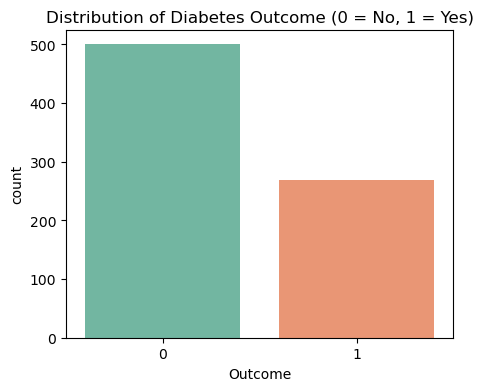

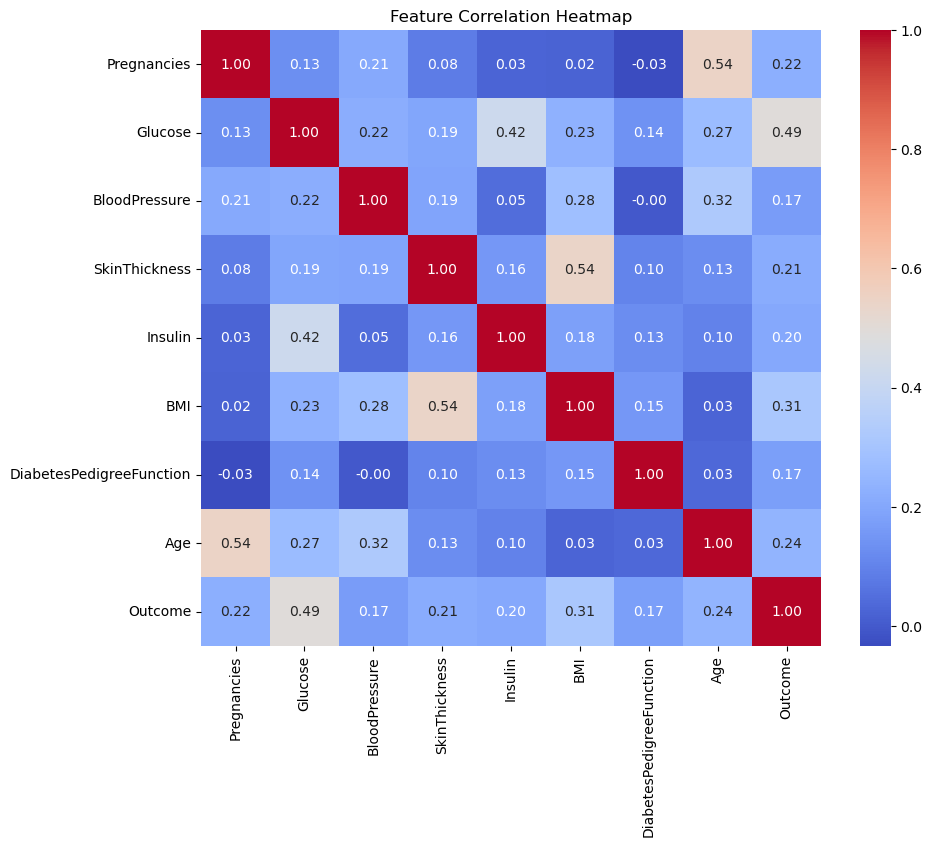

Features Shape: (768, 8)
Target Shape: (768,)

Scaling Done. Example row after scaling:
 [ 0.63994726  0.86604475 -0.03198993  0.67064253 -0.18154124  0.16661938
  0.46849198  1.4259954 ]


In [12]:
# Step 2: EDA & Preprocessing

import matplotlib.pyplot as plt
import seaborn as sns

# Basic stats
print("\nDataset Summary:\n")
display(df.describe())

# Target distribution
plt.figure(figsize=(5,4))
sns.countplot(x="Outcome", data=df, palette="Set2")
plt.title("Distribution of Diabetes Outcome (0 = No, 1 = Yes)")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Define Features (X) and Target (y)
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

print("Features Shape:", X.shape)
print("Target Shape:", y.shape)

# Scaling (Optional: Decision Tree doesn't need scaling, but good practice if we compare later with other models)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nScaling Done. Example row after scaling:\n", X_scaled[0])


In [13]:
# Outlier Analysis:
import plotly.express as px
for column in df.drop("Outcome",axis=1).columns[:5]:

    # for loop auto iterates through the first five feature columns in the dataframe

    fig = px.box(data_frame =df ,
                 x='Outcome',
                 color = 'Outcome',
                 y = column,
                 color_discrete_sequence = ["#005A75","#D4FF5C"],
                 orientation = 'v')

    fig.show()

In [14]:
# Step 3: Train-Test Split + Decision Tree Training

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Train Shape:", X_train.shape, y_train.shape)
print("Test Shape:", X_test.shape, y_test.shape)

# Initialize Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# Hyperparameter grid
param_grid = {
    "max_depth": [3, 5, 7, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ["gini", "entropy"]
}

# GridSearchCV for best parameters
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring="balanced_accuracy",
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Best parameters & model
print("Best Parameters:", grid_search.best_params_)
best_dt = grid_search.best_estimator_


Train Shape: (614, 8) (614,)
Test Shape: (154, 8) (154,)
Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


Accuracy: 0.6883
Balanced Accuracy: 0.5896

Confusion Matrix:
 [[92  8]
 [40 14]]


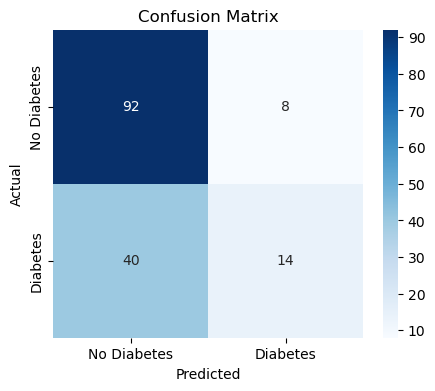


Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.92      0.79       100
           1       0.64      0.26      0.37        54

    accuracy                           0.69       154
   macro avg       0.67      0.59      0.58       154
weighted avg       0.68      0.69      0.64       154



In [15]:
# Step 4: Model Evaluation

from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, classification_report

# Predictions
y_pred = best_dt.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
bal_acc = balanced_accuracy_score(y_test, y_pred)

print("Accuracy:", round(acc, 4))
print("Balanced Accuracy:", round(bal_acc, 4))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes","Diabetes"], yticklabels=["No Diabetes","Diabetes"])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


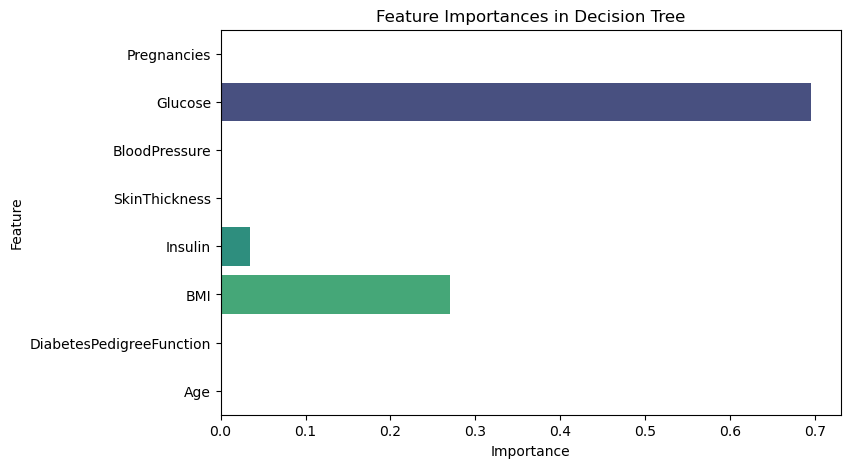

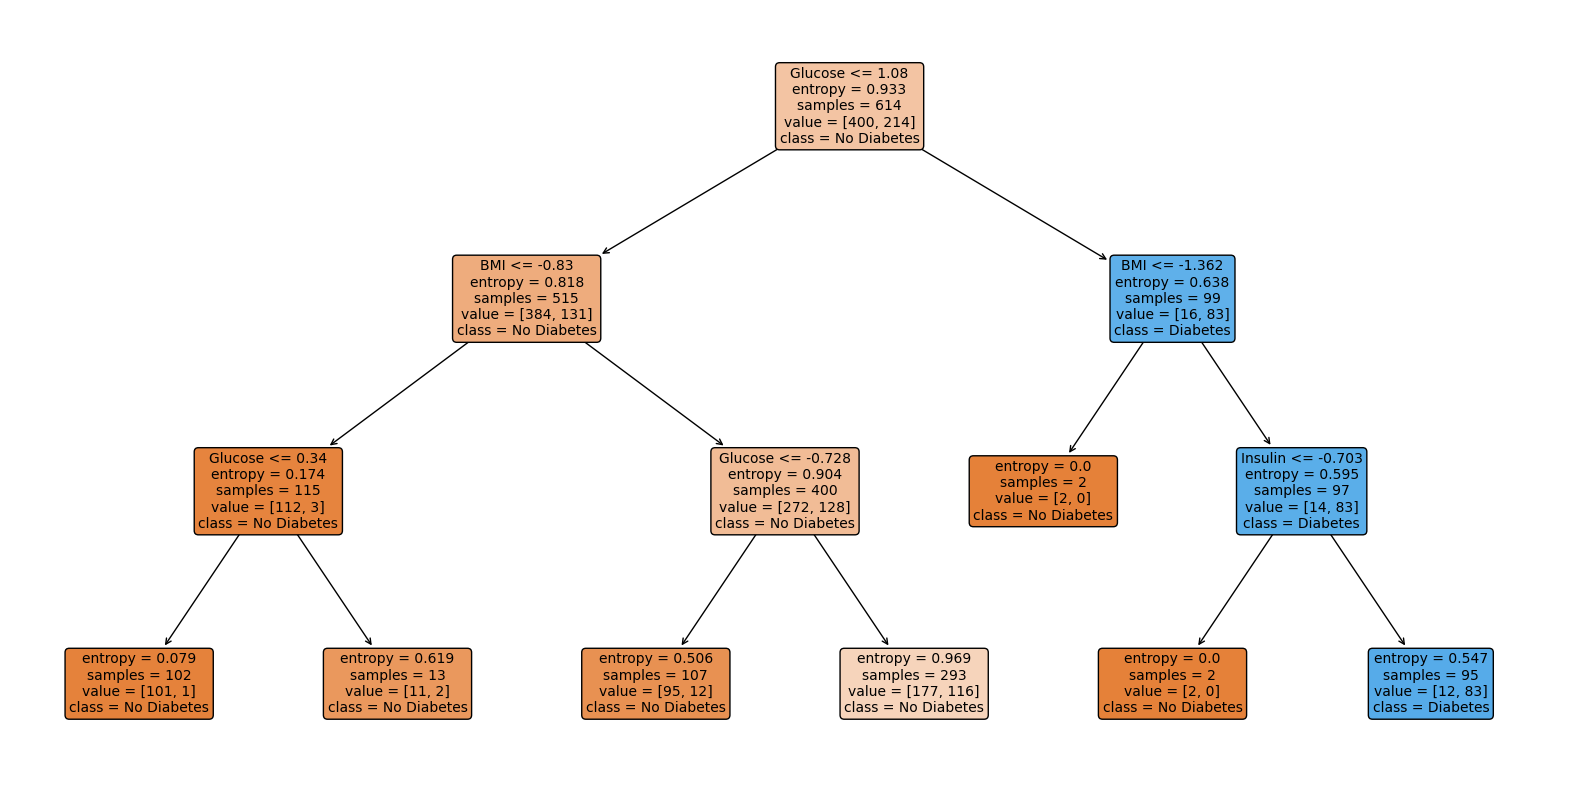

In [16]:
# Step 5: Visualization

from sklearn.tree import plot_tree

# --- Feature Importance ---
importances = best_dt.feature_importances_
feature_names = df.drop("Outcome", axis=1).columns

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=feature_names, palette="viridis")
plt.title("Feature Importances in Decision Tree")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# --- Decision Tree Plot ---
plt.figure(figsize=(20,10))
plot_tree(
    best_dt,
    feature_names=feature_names,
    class_names=["No Diabetes", "Diabetes"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()


In [17]:
# Step 6: Decision Tree from Scratch (ID3-style)

import numpy as np

class ScratchDecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def entropy(self, y):
        """Calculate entropy for labels y"""
        labels, counts = np.unique(y, return_counts=True)
        probs = counts / counts.sum()
        return -np.sum(probs * np.log2(probs + 1e-9))  # small term to avoid log(0)

    def information_gain(self, y, X_column, split_thresh):
        """Compute Information Gain after a split"""
        # parent entropy
        parent_entropy = self.entropy(y)

        # generate split
        left_idx = X_column <= split_thresh
        right_idx = X_column > split_thresh

        if len(y[left_idx]) == 0 or len(y[right_idx]) == 0:
            return 0

        # weighted avg child entropy
        n = len(y)
        n_left, n_right = len(y[left_idx]), len(y[right_idx])
        e_left, e_right = self.entropy(y[left_idx]), self.entropy(y[right_idx])
        child_entropy = (n_left/n) * e_left + (n_right/n) * e_right

        # return IG
        return parent_entropy - child_entropy

    def best_split(self, X, y, features):
        """Find the best split for given features"""
        best_gain = -1
        split_idx, split_thresh = None, None

        for feature in features:
            X_column = X[:, feature]
            thresholds = np.unique(X_column)
            for t in thresholds:
                gain = self.information_gain(y, X_column, t)
                if gain > best_gain:
                    best_gain = gain
                    split_idx = feature
                    split_thresh = t

        return split_idx, split_thresh

    def build_tree(self, X, y, depth=0):
        """Recursive tree builder"""
        labels = np.unique(y)
        # stopping conditions
        if len(labels) == 1:
            return labels[0]
        if self.max_depth is not None and depth >= self.max_depth:
            return np.bincount(y).argmax()

        # best split
        feat_idxs = range(X.shape[1])
        best_feat, best_thresh = self.best_split(X, y, feat_idxs)

        if best_feat is None:
            return np.bincount(y).argmax()

        # grow children
        left_idx = X[:, best_feat] <= best_thresh
        right_idx = X[:, best_feat] > best_thresh

        left_child = self.build_tree(X[left_idx], y[left_idx], depth+1)
        right_child = self.build_tree(X[right_idx], y[right_idx], depth+1)

        return (best_feat, best_thresh, left_child, right_child)

    def fit(self, X, y):
        self.tree = self.build_tree(X, y)

    def _predict(self, x, tree):
        if not isinstance(tree, tuple):
            return tree
        feat, thresh, left, right = tree
        if x[feat] <= thresh:
            return self._predict(x, left)
        else:
            return self._predict(x, right)

    def predict(self, X):
        return np.array([self._predict(x, self.tree) for x in X])


# --- Training the Scratch Tree ---
X_np = X_scaled if isinstance(X_scaled, np.ndarray) else X_scaled.values
y_np = y if isinstance(y, np.ndarray) else y.values

scratch_dt = ScratchDecisionTree(max_depth=3)
scratch_dt.fit(X_np, y_np)

y_pred_scratch = scratch_dt.predict(X_np)

print("Accuracy (Scratch DT):", accuracy_score(y_np, y_pred_scratch))
print("Balanced Accuracy (Scratch DT):", balanced_accuracy_score(y_np, y_pred_scratch))


Accuracy (Scratch DT): 0.7721354166666666
Balanced Accuracy (Scratch DT): 0.7384328358208956
